# 1. Importing Libraries:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2.1. Loading the data:
The PAMAP2 Dataset can be found at: https://archive.ics.uci.edu/dataset/231/pamap2+physical+activity+monitoring

Modify the root after extracting the zip files locally, or mount it on Google Drive using:

from google.colab import drive

drive.mount('/content/drive')

In [ ]:
def load_activity_map(x: int):
    map={}
    map[0]='transient'
    map[1]='lying'
    map[2]='sitting'
    map[3]='standing'
    map[4]='walking'
    map[5]='running'
    map[6]='cycling'
    map[7]='Nordic_walking'
    map[9]='watching_TV'
    map[10]='computer_work'
    map[11]='car_driving'
    map[12]='ascending_stairs'
    map[13]='descending_stairs'
    map[16]='vacuum_cleaning'
    map[17]='ironing'
    map[18]='folding_laundry'
    map[19]='house_cleaning'
    map[20]='playing_soccer'
    map[24]='rope_jumping'
    return map[x]

In [ ]:
IMU_columns=['temp', 'acc_x_sc16', 'acc_y_sc16', 'acc_z_sc16',
                'acc_x_sc6', 'acc_y_sc6', 'acc_z_sc6',
                'gyro_x', 'gyro_y', 'gyro_z',
                'mag_x', 'mag_y', 'mag_z',
                'orient_x', 'orient_y', 'orient_z', 'orient_w']
cols=['timestamp', 'activity_id', 'heart-rate'] \
            + [f'IMU_{x}_{i}' for x in ['hand', 'chest', 'ankle']  for i in IMU_columns]
def load_subjects(root='..\PAMAP2_Dataset\Protocol\subject'):
    subjects=[]
    for i in range(101, 110):
        path=root + str(i) +'.dat'
        subject=pd.read_table(path, header=None, sep='\s+')
        subject.columns=cols
        subject['id']=i
        subjects.append(subject)
    return subjects
data=load_subjects()
data_raw=pd.concat(data, ignore_index=True)
data_raw

,timestamp,activity_id,heart-rate,IMU_hand_temp,IMU_hand_acc_x_sc16,IMU_hand_acc_y_sc16,IMU_hand_acc_z_sc16,IMU_hand_acc_x_sc6,IMU_hand_acc_y_sc6,IMU_hand_acc_z_sc6,...,IMU_ankle_gyro_y,IMU_ankle_gyro_z,IMU_ankle_mag_x,IMU_ankle_mag_y,IMU_ankle_mag_z,IMU_ankle_orient_x,IMU_ankle_orient_y,IMU_ankle_orient_z,IMU_ankle_orient_w,id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,101
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,101
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,101
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,101
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,109
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,109
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,109
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,109


## 2.2. Handling missing data
Due to mismatched sampling rates of the IMU sensor at 100Hz and the Heart Rate sensor at 9Hz, the 'heart-rate' column contains a significant portion of the total null values. Other columns have sensor dropouts as well, imputing the values with the column mean values.

In [ ]:
data[1].isna().sum()
# total_na=data[1].isna().sum().sum()
# print(total_na)

timestamp                    0
activity_id                  0
heart-rate              406205
IMU_hand_temp             2729
IMU_hand_acc_x_sc16       2729
IMU_hand_acc_y_sc16       2729
IMU_hand_acc_z_sc16       2729
IMU_hand_acc_x_sc6        2729
IMU_hand_acc_y_sc6        2729
IMU_hand_acc_z_sc6        2729
IMU_hand_gyro_x           2729
IMU_hand_gyro_y           2729
IMU_hand_gyro_z           2729
IMU_hand_mag_x            2729
IMU_hand_mag_y            2729
IMU_hand_mag_z            2729
IMU_hand_orient_x         2729
IMU_hand_orient_y         2729
IMU_hand_orient_z         2729
IMU_hand_orient_w         2729
IMU_chest_temp             387
IMU_chest_acc_x_sc16       387
IMU_chest_acc_y_sc16       387
IMU_chest_acc_z_sc16       387
IMU_chest_acc_x_sc6        387
IMU_chest_acc_y_sc6        387
IMU_chest_acc_z_sc6        387
IMU_chest_gyro_x           387
IMU_chest_gyro_y           387
IMU_chest_gyro_z           387
IMU_chest_mag_x            387
IMU_chest_mag_y            387
IMU_ches

In [ ]:
def fix_data(data):
    output=[]
    for subject in data:
        subject=subject.drop(subject[subject['activity_id']==0].index)
        subject=subject.interpolate()
        output.append(subject)
    return output
fixed_data=fix_data(data)

def check_null(data):
    for idx, subject in enumerate(data):
        no_null_values=subject.isnull().sum().sum()
        print(f'Subject 10{idx + 1}: {no_null_values} null value')

for idx, subject in enumerate(fixed_data):
    no_null_values=subject.isnull().sum().sum()
    subject['heart-rate'][:no_null_values]=subject['heart-rate'].iloc[no_null_values+1]
check_null(fixed_data)
all_data=pd.concat(fixed_data)

Subject 101: 0 null value
Subject 102: 0 null value
Subject 103: 0 null value
Subject 104: 0 null value
Subject 105: 0 null value
Subject 106: 0 null value
Subject 107: 0 null value
Subject 108: 0 null value
Subject 109: 0 null value


# 3. Exploratory Data Analysis:

[Text(0, 0, '109'),
 Text(1, 0, '103'),
 Text(2, 0, '104'),
 Text(3, 0, '107'),
 Text(4, 0, '101'),
 Text(5, 0, '106'),
 Text(6, 0, '108'),
 Text(7, 0, '102'),
 Text(8, 0, '105')]

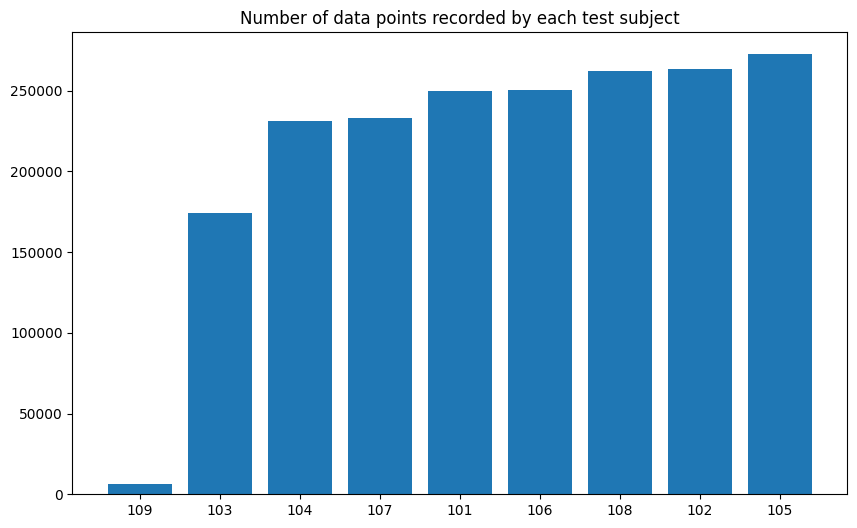

In [ ]:
samples=all_data.groupby(['id']).count().reset_index()
samples_to_subject=pd.DataFrame()
samples_to_subject['id']=samples['id']
samples_to_subject['samples']=samples['timestamp']
samples_to_subject=samples_to_subject.sort_values(by=['samples'])
fig, ax=plt.subplots(figsize=(10, 6))
ax.bar(range(len(samples_to_subject)), samples_to_subject['samples'])
ax.set_xticks(np.arange(len(samples_to_subject)))
ax.set_title('Number of data points recorded by each test subject')
ax.set_xticklabels(samples_to_subject['id'])

## Balance Analysis in the Target label:
An imbalance can be observed in the target column, with the activity Rope Jumping consisting of the least data points.

Text(0.5, 1.0, 'Number of data points by each activity')

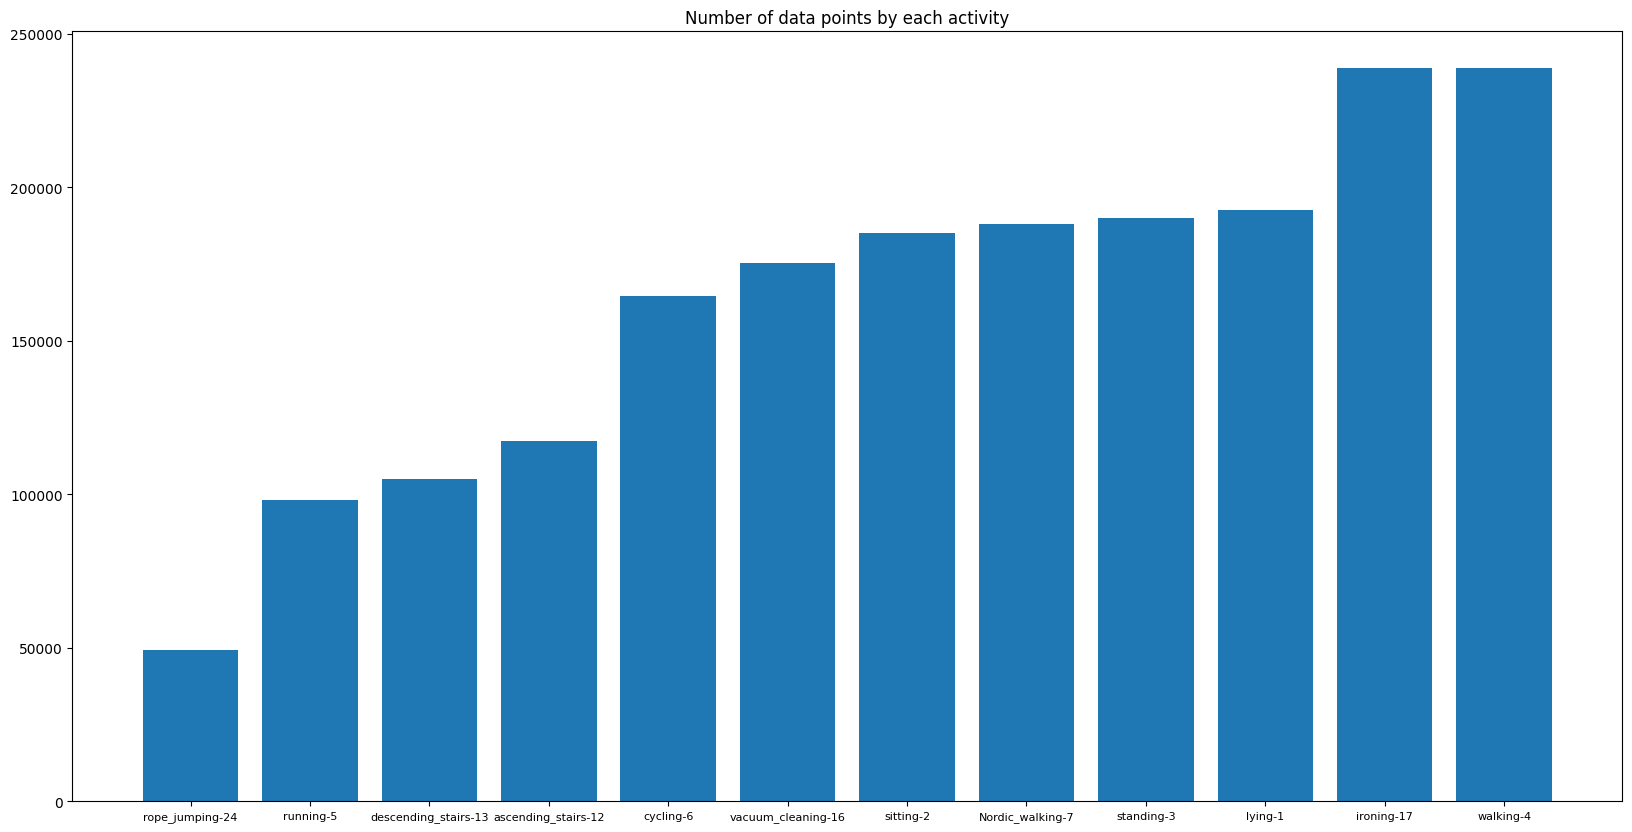

In [ ]:
samples=all_data.groupby(['activity_id']).count().reset_index()
samples_to_subject=pd.DataFrame()
samples_to_subject['activity_id']=samples['activity_id']
samples_to_subject['samples']=samples['timestamp']
samples_to_subject=samples_to_subject.sort_values(by=['samples'])
samples_to_subject['activity_id']=samples_to_subject['activity_id'].apply(load_activity_map) + '-' + samples_to_subject['activity_id'].astype(str)
fig, ax=plt.subplots(figsize=(20, 10))
ax.bar(range(len(samples_to_subject)), samples_to_subject['samples'])
ax.set_xticks(np.arange(len(samples_to_subject)))
ax.set_xticklabels(samples_to_subject['activity_id'], fontdict={'fontsize':8})
ax.set_title('Number of data points by each activity')

## Heart Rate Analysis:
Activities Running & Rope Jumping seem to have higher mean values of Heart Rate in BPM, signifying an upward BPM shift in high-intensity activities.


[Text(0, 0, 'lying'),
 Text(1, 0, 'sitting'),
 Text(2, 0, 'standing'),
 Text(3, 0, 'walking'),
 Text(4, 0, 'running'),
 Text(5, 0, 'cycling'),
 Text(6, 0, 'Nordic_walking'),
 Text(7, 0, 'ascending_stairs'),
 Text(8, 0, 'descending_stairs'),
 Text(9, 0, 'vacuum_cleaning'),
 Text(10, 0, 'ironing'),
 Text(11, 0, 'rope_jumping')]

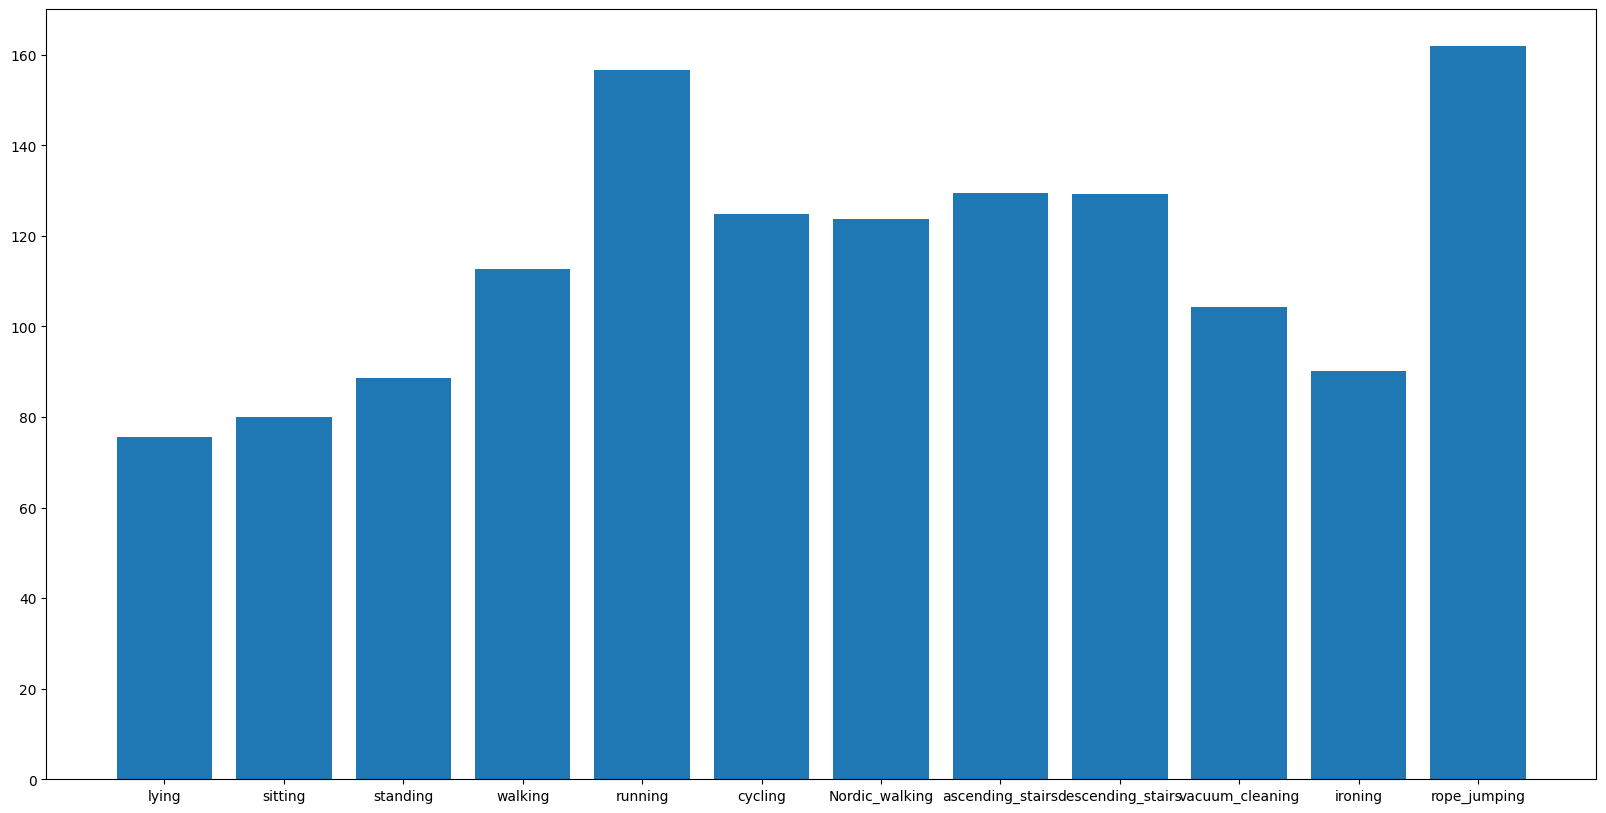

In [ ]:
samples=all_data['heart-rate'].groupby(all_data['activity_id']).mean()
samples.index=samples.index.map(load_activity_map)
fig, ax=plt.subplots(figsize=(20, 10))
ax.bar(range(len(samples)), samples)
ax.set_xticks(range(len(samples)))
ax.set_xticklabels(samples.index)

## Visualizing IMU Sensor data in time domain:
Noise, spikes and inactivity in leading & trailing edges can be seen.

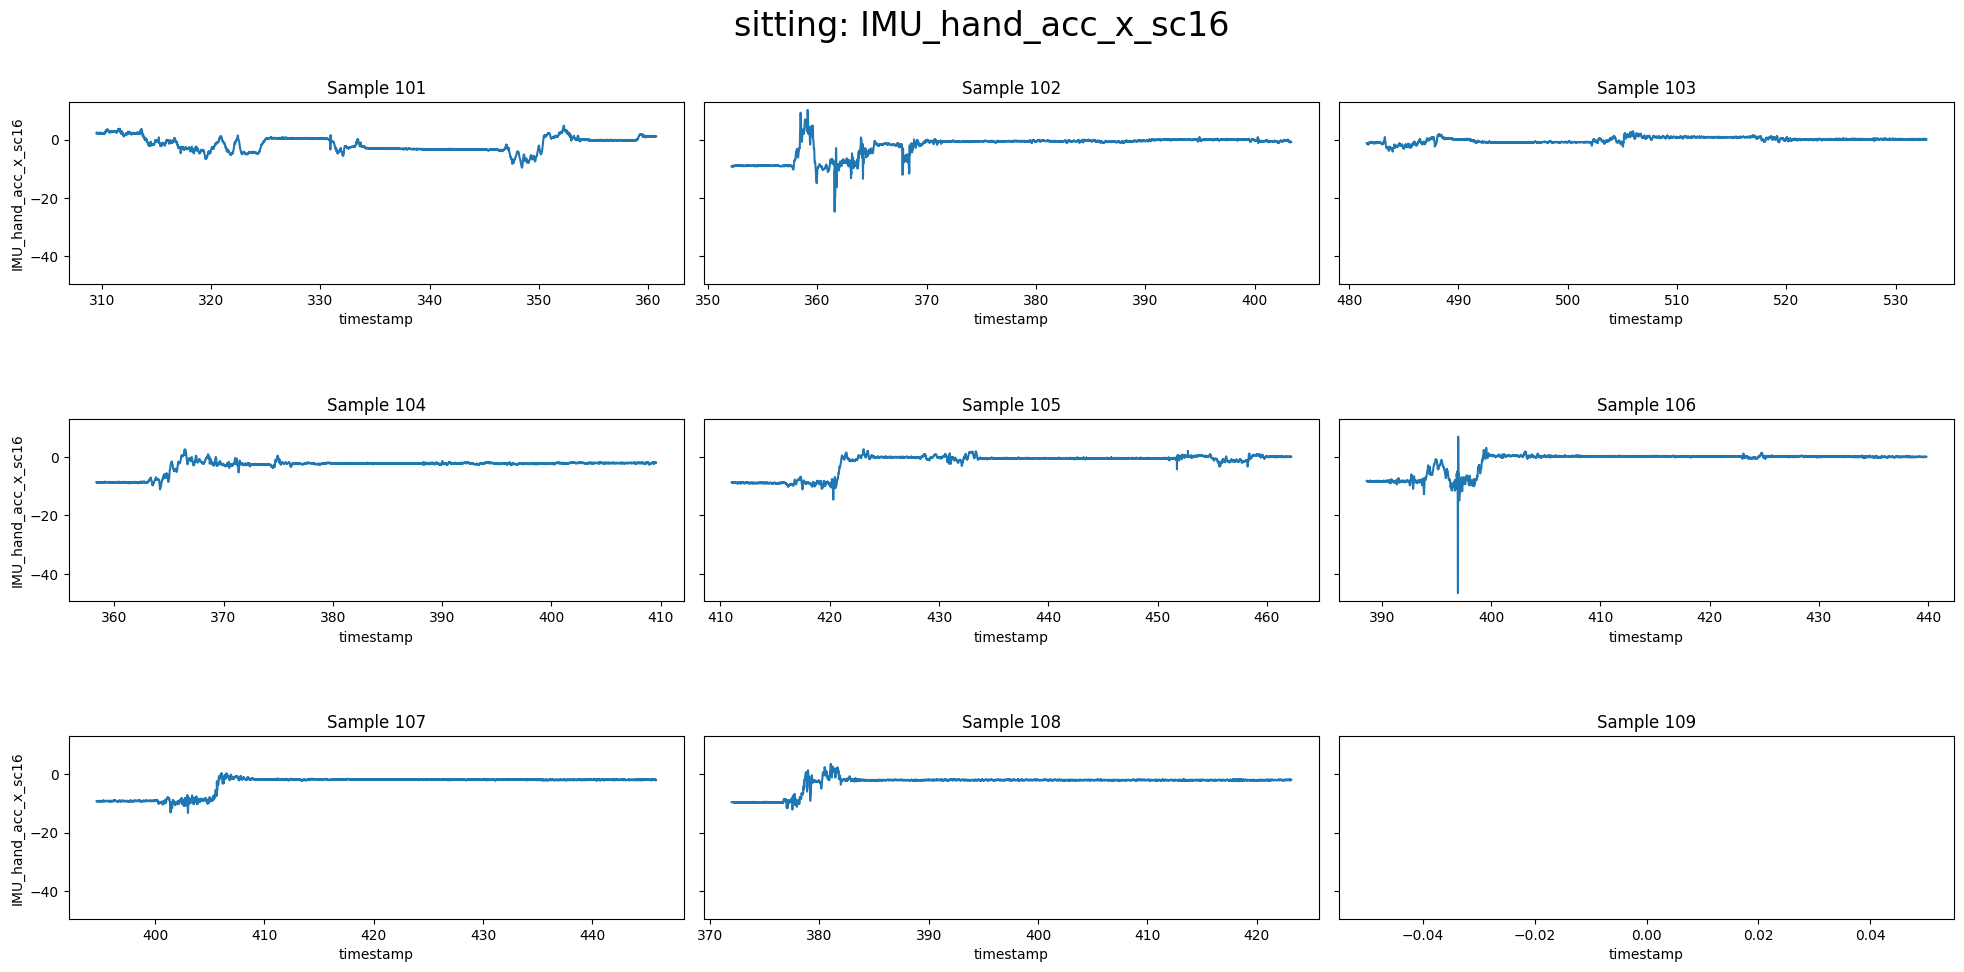

In [ ]:
def plot_sensor_data(col, activity_id):
    fig, ax=plt.subplots(ncols=3, nrows=3, figsize=(20,10), sharey=True)
    ax=ax.flatten()
    fig.suptitle(f"{load_activity_map(activity_id)}: {col}", fontsize=24)

    for index in range(9):
        df=all_data[(all_data['id']==101+index) & (all_data['activity_id']==activity_id)][:5120]
        sns.lineplot(data=df, y=col, x='timestamp', ax=ax[index])
        ax[index].set_title(f"Sample 10{index+1}")
    plt.tight_layout(pad=2, w_pad=0.7, h_pad=5.0)

plot_sensor_data(
    activity_id=2,
    col='IMU_hand_acc_x_sc16'
)

# 4. Data preprocessing:

## Trimming down sensor data

To avoid dealing with eventual transient activities, 10 seconds from the beginning and the end of each labeled activity is deleted, respectively.

In [ ]:
def to_continuous_arrs(arr: list):
    if not len(arr):
        return
    res=[]
    subarr=[arr[0]]
    for i in range(len(arr)-1):
        if (arr[i+1]-arr[i]==1):
            subarr.append(arr[i+1])
        else:
            res.append(subarr)
            subarr=[arr[i+1]]
    res.append(subarr)
    return res

def delete_begin_end_secs(activity_idxs: list, sec=10):
    res=[]
    samples=int(sec*100)
    for idx_list in activity_idxs:
        res+=idx_list[samples:-samples]
    return res

trimmed_data=[]
for subject in fixed_data:
    activity_ids=subject['activity_id'].unique()
    indices=[]
    for activity_id in activity_ids:
        idx_list=to_continuous_arrs(subject[subject['activity_id']==activity_id].index)
        indices+=delete_begin_end_secs(idx_list)
    trimmed_data.append(subject.loc[indices])

## Segmentation:

A window size of 512 samples was selected. The preprocessed data is segmented using a sliding window with the defined 5.12 seconds of window size, shifted by 1 second in-between consecutive windows.

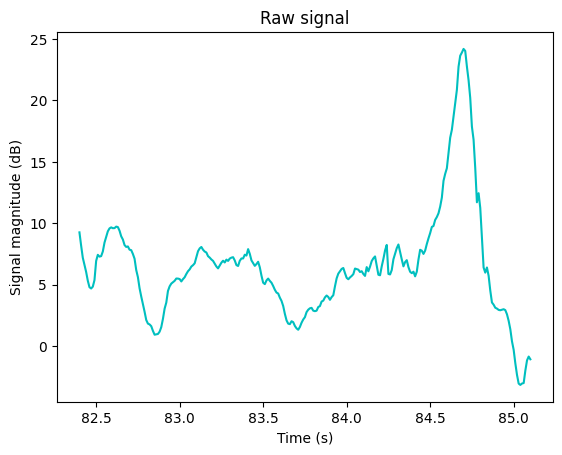

In [ ]:
def moving_window(df, length=512, shift=100):
    size=df.shape[0]
    prev=0
    for start in range(0, size, length-shift):
        yield df[start:start+length] if start+length<size else df[start:size]

def get_peaks_DFT(t, f, top=5, dt=0.01):
    n=len(t)
    fhat=np.fft.fft(f, n)
    PSD=fhat*np.conj(fhat) / n
    freq=(1/(dt*n))*np.arange(n)
    L=np.arange(1, np.floor(n/2), dtype='int')
    top_index=np.argsort(PSD, )[::-1][:top]
    return list(PSD[top_index].astype(np.float64)), list(top_index)

N_FFT_PEAKS=5
subject=trimmed_data[0]
columns=['activity_id']
new_feats=['max', 'min', 'mean', 'var', 'skew', 'kurtosis']
fft_feats=[f'top{i}_{k}' for k in ['PSD', 'freq'] for i in range(1, N_FFT_PEAKS+1)]
new_feats+=fft_feats
new_cols=[f'{feat}_{col}' for col in subject.columns[4:-1] for feat in new_feats]
columns+=new_cols+['id']
rows=[]
for subject in trimmed_data:
    for segment in moving_window(subject):
        row=[]
        row.append(segment['activity_id'].mode()[0])
        t=segment['timestamp']
        for i in range(4, len(segment.columns)-1):
            series = segment.iloc[:, i]
            row.append(series.max())
            row.append(series.min())
            row.append(series.mean())
            row.append(series.var())
            row.append(series.skew())
            row.append(series.kurtosis())
            top_PSDs, top_freqs=get_peaks_DFT(t, series, top=N_FFT_PEAKS)
            row+=top_PSDs+top_freqs
        row.append(segment['id'].iloc[0])
        rows.append(row)
segmented=pd.DataFrame(rows, columns=columns)
segmented
segmented.to_csv('segmented.csv')
dt=0.01
t=segment.iloc[:, 0]
f=segment.iloc[:, 5]
plt.plot(t, f, color='c')
plt.xlabel('Time (s)')
plt.ylabel('Signal magnitude (dB)')
plt.title('Raw signal')
plt.show()


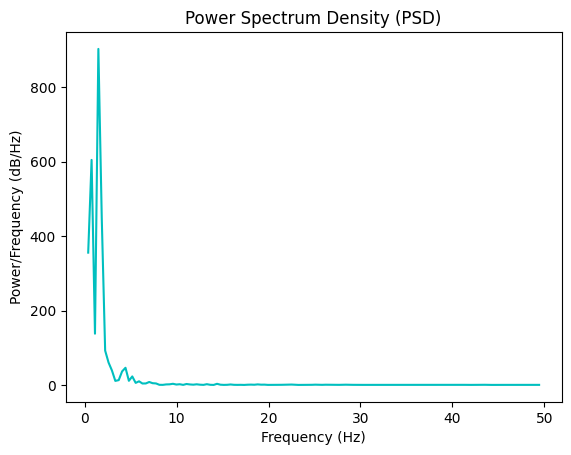

In [ ]:
n=len(t)
fhat=np.fft.fft(f, n)
PSD=fhat*np.conj(fhat) / n
freq=(1/(dt*n))*np.arange(n)
L=np.arange(1, np.floor(n/2), dtype='int')
plt.plot(freq[L], PSD[L], color='c')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.title('Power Spectrum Density (PSD)')
plt.show()

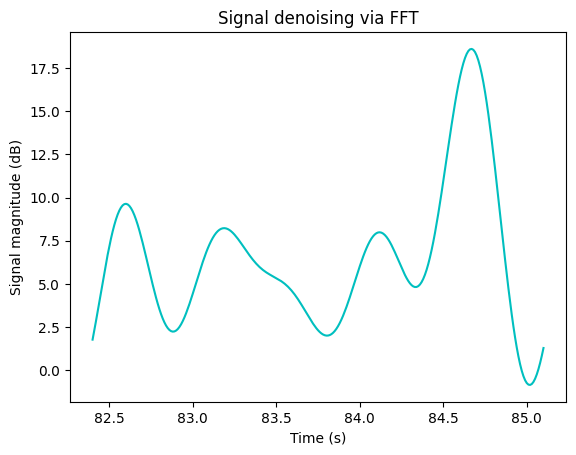

In [ ]:
#Using PSD to filter out noise.
indices=PSD>100       #Finding all freqs with large power
PSDclean=PSD*indices
fhat=indices*fhat     #Zeroing out small Fourier coefficients
ffilt=np.fft.ifft(fhat) #Inversing FFT for filtered time signal
plt.plot(t,ffilt,color='c')
plt.xlabel('Time (s)')
plt.ylabel('Signal magnitude (dB)')
plt.title('Signal denoising via FFT')
plt.show()

## 5. Feature Matrix, Label Encoder & Scaler:
Prepare feature matrix from the `segmented` DataFrame produced earlier. Encode labels and split subjects into source (train) and a held-out target (test) for cross-subject evaluation.

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
feature_cols=[c for c in segmented.columns if c not in ('activity_id', 'id')]
X=segmented[feature_cols].values.astype(np.float32)
y_raw=segmented['activity_id'].values
ids=segmented['id'].values
from collections import Counter
count_by_activity=Counter(y_raw)
freq_activities=[act for act, cnt in count_by_activity.items() if cnt>200]  #threshold
mask=np.isin(y_raw, freq_activities)
X=X[mask]
y_raw=y_raw[mask]
ids=ids[mask]

def SMOTE(X, y):
    from imblearn.over_sampling import SMOTE
    smote=SMOTE()
    X_res, y_res=smote.fit_resample(X, y)
    return X_res, y_res
#X, y=SMOTE(X, y_raw)
le=LabelEncoder()
y=le.fit_transform(y_raw)

scaler=StandardScaler()
X=scaler.fit_transform(X)

### Subject split for cross-subject experiments
Select several subjects as source subjects and hold out one subject as the unseen target (LOSO).

In [ ]:
unique_ids=np.unique(ids)
print('Available subject ids in the segmented data:', unique_ids)
#Choosing subject_108 as the target, others as source. Subject 109 discarded due to imbalanced participation.
if len(unique_ids)<3:
    raise RuntimeError('Need at least 3 subjects in segmented dataset to run cross-subject experiments')
source_ids=list(unique_ids[:-1])
target_id=unique_ids[-1]
print('Target ID:', target_id)
source_mask=np.isin(ids, source_ids)
target_mask=ids==target_id
X_source, y_source=X[source_mask], y[source_mask]
X_target, y_target=X[target_mask], y[target_mask]

Available subject ids in the segmented data: [101 102 103 104 105 106 107 108]
Target ID: 108


## 6. Baseline: Training a simple classifier on source and testing on target

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#Logistic Regression baseline:
clf=LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga')
clf.fit(X_source, y_source)
y_pred=clf.predict(X_target)
acc_baseline=accuracy_score(y_target, y_pred)
labels_arr=np.arange(len(le.classes_))
target_names=[f"{load_activity_map(int(a))}-{int(a)}" for a in le.classes_]
print('Baseline cross-subject accuracy (Logistic Regression):', acc_baseline)
print(classification_report(y_target, y_pred, labels=labels_arr, target_names=target_names))

#Random Forest baseline for comparison:
rf=RandomForestClassifier(n_estimators=200, max_depth=20, class_weight='balanced_subsample', random_state=0, n_jobs=-1)
rf.fit(X_source, y_source)
y_pred_rf=rf.predict(X_target)
acc_rf=accuracy_score(y_target, y_pred_rf)
print('Baseline cross-subject accuracy (Random Forest):', acc_rf)
print(classification_report(y_target, y_pred_rf, labels=labels_arr, target_names=target_names))

Baseline cross-subject accuracy (Logistic Regression): 0.8274582560296846
                     precision    recall  f1-score   support

            lying-1       1.00      0.80      0.89        54
          sitting-2       0.67      0.72      0.69        50
         standing-3       0.50      1.00      0.67        57
          walking-4       0.97      1.00      0.99        72
          running-5       1.00      1.00      1.00        36
          cycling-6       0.98      1.00      0.99        57
   Nordic_walking-7       1.00      0.97      0.98        65
ascending_stairs-12       1.00      0.95      0.97        19
 vacuum_cleaning-16       0.81      1.00      0.89        54
         ironing-17       0.83      0.13      0.23        75

           accuracy                           0.83       539
          macro avg       0.88      0.86      0.83       539
       weighted avg       0.87      0.83      0.80       539

Baseline cross-subject accuracy (Random Forest): 0.9461966604823747
 

## 7. CORAL (Correlation Alignment)
Applying CORAL to align source features to the target covariance and re-train the same classifier.

CORAL-aligned baseline accuracy: 0.862708719851577
                     precision    recall  f1-score   support

            lying-1       0.87      0.98      0.92        54
          sitting-2       0.79      0.74      0.76        50
         standing-3       0.79      0.84      0.81        57
          walking-4       0.99      0.99      0.99        72
          running-5       1.00      0.97      0.99        36
          cycling-6       0.92      0.84      0.88        57
   Nordic_walking-7       0.94      0.95      0.95        65
ascending_stairs-12       0.86      0.95      0.90        19
 vacuum_cleaning-16       0.77      0.80      0.78        54
         ironing-17       0.74      0.67      0.70        75

           accuracy                           0.86       539
          macro avg       0.87      0.87      0.87       539
       weighted avg       0.86      0.86      0.86       539



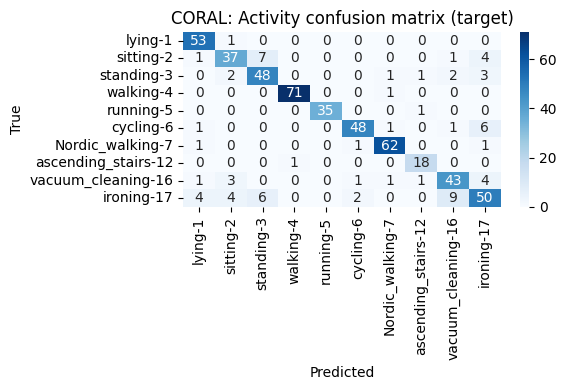

In [ ]:
def coral_transform(Xs, Xt, eps=1e-6):
    """Align second-order statistics of Xs to Xt using a stable eigen-decomposition."""
    cov_s=np.cov(Xs, rowvar=False)+np.eye(Xs.shape[1])*eps
    cov_t=np.cov(Xt, rowvar=False)+np.eye(Xt.shape[1])*eps

    def matrix_sqrt(M):
        eigvals, eigvecs=np.linalg.eigh(M)
        eigvals[eigvals<0]=0.0
        D=np.diag(np.sqrt(eigvals))
        return eigvecs @ D @ eigvecs.T

    cov_s_inv_sqrt=np.linalg.inv(matrix_sqrt(cov_s))
    cov_t_sqrt=matrix_sqrt(cov_t)

    Xs_centered=Xs-Xs.mean(axis=0)
    Xs_coral=Xs_centered @ cov_s_inv_sqrt.T @ cov_t_sqrt.T + Xt.mean(axis=0)
    return Xs_coral

#Applying CORAL alignment on the scaled features.
X_source_coral=coral_transform(X_source, X_target)
clf_coral=LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga')  #Using our baseline Logistic Regression classifier for shorter training time.
clf_coral.fit(X_source_coral, y_source)
y_pred_coral=clf_coral.predict(X_target)
acc_coral=accuracy_score(y_target, y_pred_coral)

#Build explicit labels and names to avoid errors when the target lacks some classes
labels_arr=np.arange(len(le.classes_))
target_names=[f"{load_activity_map(int(a))}-{int(a)}" for a in le.classes_]
print('CORAL-aligned baseline accuracy:', acc_coral)
print(classification_report(y_target, y_pred_coral, labels=labels_arr, target_names=target_names))

#Confusion matrix plot
from sklearn.metrics import confusion_matrix
present=np.unique(np.concatenate([y_target, y_pred_coral]))
cm=confusion_matrix(y_target, y_pred_coral, labels=present)
cm_names=[f"{load_activity_map(int(le.classes_[lab]))}-{int(le.classes_[lab])}" for lab in present]
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=cm_names, yticklabels=cm_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CORAL: Activity confusion matrix (target)')
plt.tight_layout()

## 8. DANN (Domain-Adversarial Neural Network):

Using device: cpu
Epoch 1/10 - label_loss: 0.3513, domain_loss: 0.1069
Epoch 2/10 - label_loss: 0.3344, domain_loss: 0.1067
Epoch 3/10 - label_loss: 0.3111, domain_loss: 0.1064
Epoch 4/10 - label_loss: 0.2799, domain_loss: 0.1065
Epoch 5/10 - label_loss: 0.2409, domain_loss: 0.1064
Epoch 6/10 - label_loss: 0.1964, domain_loss: 0.1053
Epoch 7/10 - label_loss: 0.1535, domain_loss: 0.1033
Epoch 8/10 - label_loss: 0.1257, domain_loss: 0.1032
Epoch 9/10 - label_loss: 0.0881, domain_loss: 0.1031
Epoch 10/10 - label_loss: 0.0682, domain_loss: 0.1027
DANN adapted accuracy on target: 0.8961038961038961
                     precision    recall  f1-score   support

            lying-1       1.00      1.00      1.00        54
          sitting-2       0.92      0.92      0.92        50
         standing-3       0.74      0.88      0.80        57
          walking-4       0.96      0.99      0.97        72
          running-5       1.00      1.00      1.00        36
          cycling-6       0.90  

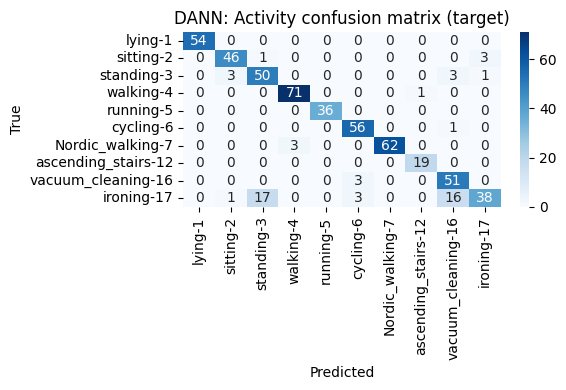

In [ ]:
#Lightweight DANN training and evaluation (PyTorch):
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
X_src_t=torch.from_numpy(X_source).float()
y_src_t=torch.from_numpy(y_source).long()
X_tgt_t=torch.from_numpy(X_target).float()
y_tgt_t=torch.from_numpy(y_target).long()
src_ds=TensorDataset(X_src_t, y_src_t)
tgt_ds=TensorDataset(X_tgt_t, y_tgt_t)
src_loader=DataLoader(src_ds, batch_size=256, shuffle=True, drop_last=True)
tgt_loader=DataLoader(tgt_ds, batch_size=256, shuffle=True, drop_last=True)

class GradReverse(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, lambd):
        ctx.lambd=lambd
        return x.view_as(x)
    @staticmethod
    def backward(ctx, grad_output):
        return grad_output.neg()*ctx.lambd, None

class FeatureExtractor(nn.Module):
    def __init__(self, input_dim, feat_dim=128):
        super().__init__()
        self.net=nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, feat_dim),
            nn.ReLU()
        )
    def forward(self, x):
        return self.net(x)

class LabelPredictor(nn.Module):
    def __init__(self, feat_dim, n_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feat_dim, 64),
            nn.ReLU(),
            nn.Linear(64, n_classes)
        )
    def forward(self, x):
        return self.net(x)

class DomainClassifier(nn.Module):
    def __init__(self, feat_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(feat_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 2)
        )
    def forward(self, x):
        return self.net(x)

n_classes=len(le.classes_)
feat_dim=128
feat_extractor=FeatureExtractor(X_source.shape[1], feat_dim).to(device)
label_predictor=LabelPredictor(feat_dim, n_classes).to(device)
domain_clf=DomainClassifier(feat_dim).to(device)

criterion_label=nn.CrossEntropyLoss()
criterion_domain=nn.CrossEntropyLoss()
optimizer=optim.Adam(list(feat_extractor.parameters()) + list(label_predictor.parameters()) + list(domain_clf.parameters()), lr=1e-3)

def train_dann(epochs=8):
    feat_extractor.train()
    label_predictor.train()
    domain_clf.train()
    for epoch in range(epochs):
        total_label_loss=0.0
        total_domain_loss=0.0
        for (xs, ys), (xt, yt) in zip(src_loader, tgt_loader):
            xs=xs.to(device); ys=ys.to(device)
            xt=xt.to(device)
            batch=torch.cat([xs, xt], dim=0)
            domain_labels=torch.cat([torch.zeros(xs.size(0), dtype=torch.long), torch.ones(xt.size(0), dtype=torch.long)], dim=0).to(device)
            feats=feat_extractor(batch)
            preds_label=label_predictor(feats[:xs.size(0)])
            loss_label=criterion_label(preds_label, ys)

            lambd=0.1
            feats_rev=GradReverse.apply(feats, lambd)
            preds_domain=domain_clf(feats_rev)
            loss_domain=criterion_domain(preds_domain, domain_labels)
            loss=loss_label+0.5*loss_domain
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_label_loss+=loss_label.item()
            total_domain_loss+=loss_domain.item()
        print(f'Epoch {epoch+1}/{epochs} - label_loss: {total_label_loss/len(src_loader):.4f}, domain_loss: {total_domain_loss/len(src_loader):.4f}')
train_dann(epochs=10)
#Evaluating on target:
feat_extractor.eval(); label_predictor.eval()
with torch.no_grad():
    feats_tgt=feat_extractor(torch.from_numpy(X_target).float().to(device))
    logits=label_predictor(feats_tgt)
    preds=logits.argmax(dim=1).cpu().numpy()
    acc_dann=(preds==y_target).mean()
    labels_arr=np.arange(len(le.classes_))
    target_names=[f"{load_activity_map(int(a))}-{int(a)}" for a in le.classes_]
    print('DANN adapted accuracy on target:', acc_dann)
    print(classification_report(y_target, preds, labels=labels_arr, target_names=target_names))

    #Confusion matrix plot (only for present classes to keep visuals compact)
    present=np.unique(np.concatenate([y_target, preds]))
    cm=confusion_matrix(y_target, preds, labels=present)
    cm_names=[f"{load_activity_map(int(le.classes_[lab]))}-{int(le.classes_[lab])}" for lab in present]
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=cm_names, yticklabels=cm_names, cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('DANN: Activity confusion matrix (target)')
    plt.tight_layout()

## 9. Physiological Load Estimation:
Normalizing all the Heart Rate (BPM) values using the Standard Scaler. Now that all values fall within 0 to 1, using tertile division to encode any value under 0.33 as Low exertion level, over 0.33 and below 0.67 as Moderate exertion level and anything above or equal to that as High exertion level.

Since actual exertion levels are not available in the PAMAP2 dataset, the heart rate is the closest correlated feature that conveys physiological load information. Thus, using proxy labeling to train fatigue estimation models.

Exertion baseline (source->target) accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       188
           1       0.72      0.50      0.59       183
           2       0.76      0.92      0.83       168

    accuracy                           0.77       539
   macro avg       0.76      0.77      0.76       539
weighted avg       0.76      0.77      0.75       539



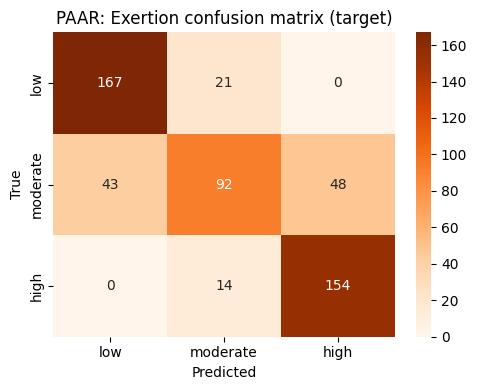

In [ ]:
from collections import Counter
#Re-creating segmented windows with same features as earlier but adding heart-rate stats per-window.
rows=[]
for subject in trimmed_data:
    for segment in moving_window(subject):
        row={}
        row['activity_id']=int(segment['activity_id'].mode()[0])
        for i in range(4, len(segment.columns)-1):
            col=segment.columns[i]
            s=segment.iloc[:, i]
            row[f'{col}_max']=float(s.max())
            row[f'{col}_min']=float(s.min())
            row[f'{col}_mean']=float(s.mean())
            row[f'{col}_var']=float(s.var())
            row[f'{col}_skew']=float(s.skew())
            row[f'{col}_kurtosis']=float(s.kurtosis())
            try:
                top_PSDs, top_freqs=get_peaks_DFT(segment['timestamp'], s, top=N_FFT_PEAKS)
            except Exception:
                top_PSDs, top_freqs=[0.0]*N_FFT_PEAKS, [0.0]*N_FFT_PEAKS
            for j in range(N_FFT_PEAKS):
                row[f'top{j+1}_PSD_{col}']=float(top_PSDs[j]) if j < len(top_PSDs) else 0.0
                row[f'top{j+1}_freq_{col}']=float(top_freqs[j]) if j < len(top_freqs) else 0.0
        hr = segment['heart-rate'] if 'heart-rate' in segment.columns else pd.Series(dtype=float)
        row['hr_mean']=float(hr.mean()) if len(hr) else 0.0
        row['hr_std']=float(hr.std()) if len(hr) else 0.0
        row['id']=int(segment['id'].iloc[0])
        rows.append(row)
seg_full=pd.DataFrame(rows)
if seg_full.shape[0]==0:
    raise RuntimeError('seg_full is empty: ensure trimmed_data and moving_window were run successfully')
#Using per-subject tertiles (33% / 66%) on the distribution of per-segment mean HR to define low/moderate/high.
hr_tertiles = {}
for sid in seg_full['id'].unique():
    subj_hr = seg_full[seg_full['id']==sid]['hr_mean'].dropna()
    if subj_hr.shape[0]<3:
        #fallback small-sample defaults
        q33, q66=60.0, 100.0
    else:
        q33=float(subj_hr.quantile(0.33))
        q66=float(subj_hr.quantile(0.66))
    hr_tertiles[int(sid)]=(q33, q66)

def hr_to_exertion_tertile(row):
    q33, q66=hr_tertiles[int(row['id'])]
    hrv=row['hr_mean']
    if np.isnan(hrv):
        return 1  #Unknown → treat as moderate to avoid extreme labeling
    if hrv<=q33:
        return 0
    elif hrv<=q66:
        return 1
    else:
        return 2
seg_full['exertion']=seg_full.apply(hr_to_exertion_tertile, axis=1)

#Preparing features and labels
feat_cols=[c for c in seg_full.columns if c not in ('activity_id', 'id', 'exertion')]
X_all=seg_full[feat_cols].fillna(0.0).values.astype(np.float32)
y_act_all=seg_full['activity_id'].values
y_ex_all=seg_full['exertion'].values
ids_all=seg_full['id'].values

#Filter frequent activities
count_by_activity=Counter(y_act_all)
freq_activities=[act for act, cnt in count_by_activity.items() if cnt > 200]
mask=np.isin(y_act_all, freq_activities)
X_all=X_all[mask]
y_act_all=y_act_all[mask]
y_ex_all=y_ex_all[mask]
ids_all=ids_all[mask]

if X_all.shape[0]==0:
    raise RuntimeError('No data left after frequency filtering. Consider lowering threshold or checking segmented windows')
le_act=LabelEncoder()
y_act=le_act.fit_transform(y_act_all)
le=le_act
le_ex=LabelEncoder()
y_ex=le_ex.fit_transform(y_ex_all)

#Subject split
unique_ids=np.unique(ids_all)
if len(unique_ids)<3:
    raise RuntimeError('Need at least 3 subjects in segmented dataset to run cross-subject experiments')
source_ids=list(unique_ids[:-1])
target_id=unique_ids[-1]
source_mask=np.isin(ids_all, source_ids)
target_mask=ids_all==target_id
X_source=X_all[source_mask].copy()
X_target=X_all[target_mask].copy()
y_act_src=np.asarray(y_act[source_mask])
y_act_tgt=np.asarray(y_act[target_mask])
y_ex_src=np.asarray(y_ex[source_mask])
y_ex_tgt=np.asarray(y_ex[target_mask])
X_src=X_source.copy()
X_tgt=X_target.copy()

scaler=StandardScaler()
X_src_s=scaler.fit_transform(X_src)
X_tgt_s=scaler.transform(X_tgt)

#Exertion baseline
clf_ex=LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga')
clf_ex.fit(X_src_s, y_ex_src)
y_ex_pred=clf_ex.predict(X_tgt_s)
acc_ex=accuracy_score(y_ex_tgt, y_ex_pred)
print('Exertion baseline (source->target) accuracy:', acc_ex)
print(classification_report(y_ex_tgt, y_ex_pred))

#Confusion matrices: activity (labels present in target) and exertion (0=low, 1=moderate, 2=high)
present_ex=np.unique(np.concatenate([y_ex_tgt, y_ex_pred]))
cm_ex=confusion_matrix(y_ex_tgt, y_ex_pred, labels=present_ex)
ex_names=['low', 'moderate', 'high']
cm_names_ex=[ex_names[int(l)] for l in present_ex]
plt.figure(figsize=(5,4))
sns.heatmap(cm_ex, annot=True, fmt='d', xticklabels=cm_names_ex, yticklabels=cm_names_ex, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('PAAR: Exertion confusion matrix (target)')
plt.tight_layout()
plt.show()

## 10. Early Activity Recognition (EAR) — partial-window prediction

Predict activity using only the first 1-3 seconds of each window. We extract the same simple time-domain features used earlier (max, min, mean, var, skew, kurtosis) on prefixes of each 5.12s segment and evaluate a lightweight classifier trained on source subjects and tested on the held-out target subject.


Prefix length: 100 samples
Target accuracy: 0.5213358070500927
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.06      0.08      0.07        50
           2       0.42      0.91      0.57        57
           3       0.59      0.99      0.74        72
           4       1.00      0.86      0.93        36
           5       0.70      0.95      0.81        57
           6       1.00      0.23      0.38        65
           7       0.75      0.47      0.58        19
           8       0.52      0.83      0.64        54
           9       0.00      0.00      0.00        75

    accuracy                           0.52       539
   macro avg       0.50      0.53      0.47       539
weighted avg       0.47      0.52      0.44       539



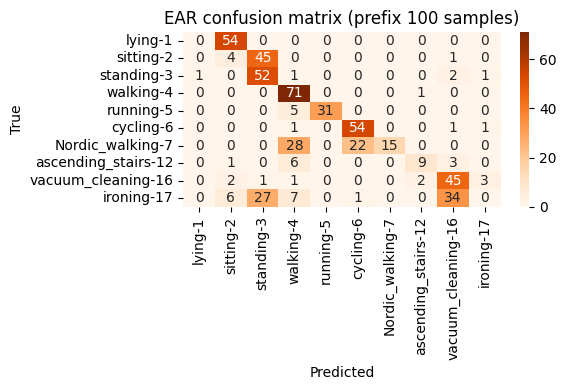


Prefix length: 200 samples
Target accuracy: 0.5528756957328386
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.14      0.20      0.16        50
           2       0.41      0.96      0.57        57
           3       0.67      1.00      0.80        72
           4       1.00      0.94      0.97        36
           5       0.64      0.95      0.77        57
           6       0.94      0.26      0.41        65
           7       0.87      0.68      0.76        19
           8       0.59      0.80      0.68        54
           9       0.00      0.00      0.00        75

    accuracy                           0.55       539
   macro avg       0.53      0.58      0.51       539
weighted avg       0.48      0.55      0.47       539



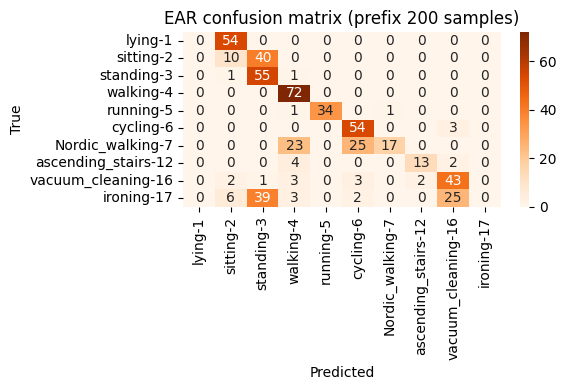


Prefix length: 300 samples
Target accuracy: 0.5584415584415584
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.26      0.44      0.33        50
           2       0.49      0.98      0.65        57
           3       0.70      1.00      0.82        72
           4       1.00      0.97      0.99        36
           5       0.55      0.93      0.69        57
           6       1.00      0.09      0.17        65
           7       0.93      0.68      0.79        19
           8       0.52      0.81      0.64        54
           9       0.00      0.00      0.00        75

    accuracy                           0.56       539
   macro avg       0.55      0.59      0.51       539
weighted avg       0.50      0.56      0.46       539



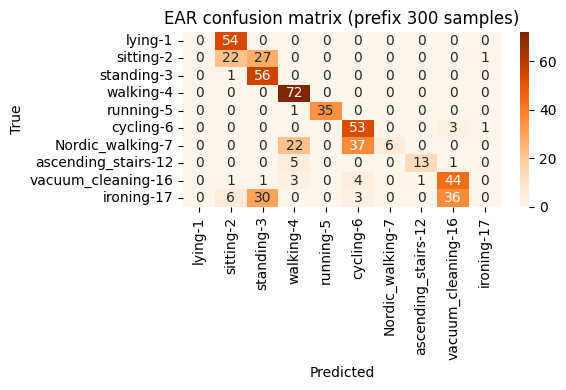


Prefix length: 512 samples
Target accuracy: 0.5547309833024119
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.31      0.54      0.39        50
           2       0.44      0.96      0.61        57
           3       0.52      1.00      0.69        72
           4       1.00      1.00      1.00        36
           5       0.75      0.95      0.84        57
           6       0.00      0.00      0.00        65
           7       0.92      0.58      0.71        19
           8       0.66      0.81      0.73        54
           9       0.00      0.00      0.00        75

    accuracy                           0.55       539
   macro avg       0.46      0.58      0.50       539
weighted avg       0.39      0.55      0.45       539



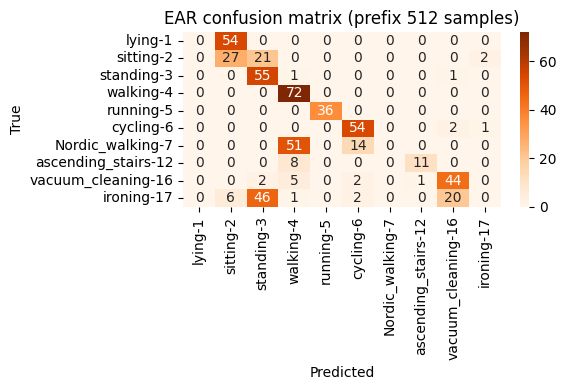

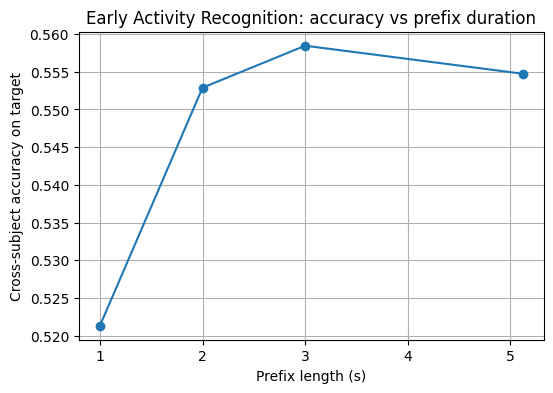

In [ ]:
#Building prefix-based datasets and evaluating baseline performance for multiple prefix lengths.
from collections import defaultdict
#Prefix lengths in samples (100 ~ 1s, 200 ~ 2s, 300 ~ 3s, 512 full window)
prefix_lengths=[100, 200, 300, 512]
sensor_cols=list(trimmed_data[0].columns[4:-1])

def extract_time_features(prefix_df):
    feats=[]
    for col in sensor_cols:
        s=prefix_df[col]
        feats.append(s.max())
        feats.append(s.min())
        feats.append(s.mean())
        feats.append(s.var())
        feats.append(s.skew())
        feats.append(s.kurtosis())
    return np.array(feats, dtype=np.float32)

#iterate trimmed_data and moving_window to re-create segments and build prefix datasets
results={}
for pref in prefix_lengths:
    X_list=[]
    y_list=[]
    id_list=[]
    for subj in trimmed_data:
        for segment in moving_window(subj):
            if segment.shape[0]<pref:
                continue
            prefix=segment.iloc[:pref]
            feat=extract_time_features(prefix)
            X_list.append(feat)
            y_list.append(segment['activity_id'].mode()[0])
            id_list.append(int(segment['id'].iloc[0]))
    X_pref=np.vstack(X_list)
    y_pref_raw=np.array(y_list)
    ids_pref=np.array(id_list)

    #Keeping the same activity filtering as earlier (only activities kept in le.classes_)
    mask=np.isin(y_pref_raw, le.classes_)
    X_pref=X_pref[mask]
    y_pref_raw=y_pref_raw[mask]
    ids_pref=ids_pref[mask]
    y_pref=le.transform(y_pref_raw)
    #Split into source / target using the same source_ids / target_id defined earlier
    src_mask=np.isin(ids_pref, source_ids)
    tgt_mask=ids_pref==target_id
    X_src_pref, y_src_pref=X_pref[src_mask], y_pref[src_mask]
    X_tgt_pref, y_tgt_pref=X_pref[tgt_mask], y_pref[tgt_mask]
    #Standardize features with a lightweight scaler fit on source prefixes
    scaler_pref=StandardScaler()
    X_src_pref=scaler_pref.fit_transform(X_src_pref)
    X_tgt_pref=scaler_pref.transform(X_tgt_pref)
    #If not enough samples on either side, skip
    if X_src_pref.shape[0]<20 or X_tgt_pref.shape[0]<5:
        print(f'Prefix {pref}: insufficient samples (src {X_src_pref.shape[0]}, tgt {X_tgt_pref.shape[0]}) — skipped')
        continue
    clf=LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga')
    clf.fit(X_src_pref, y_src_pref)
    y_tgt_pred=clf.predict(X_tgt_pref)
    acc=accuracy_score(y_tgt_pref, y_tgt_pred)
    labels_arr=np.arange(len(le.classes_))
    target_names=[f"{load_activity_map(int(a))}-{int(a)}" for a in le.classes_]
    print('\nPrefix length:', pref, 'samples')
    print('Target accuracy:', acc)
    print(classification_report(y_tgt_pref, y_tgt_pred))

    #Confusion matrix
    from sklearn.metrics import confusion_matrix
    present = np.unique(np.concatenate([y_tgt_pref, y_tgt_pred]))
    cm = confusion_matrix(y_tgt_pref, y_tgt_pred, labels=present)
    cm_names = [f"{load_activity_map(int(le.classes_[lab]))}-{int(le.classes_[lab])}" for lab in present]
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=cm_names, yticklabels=cm_names, cmap='Oranges')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'EAR confusion matrix (prefix {pref} samples)')
    plt.tight_layout()
    plt.show()
    results[pref] = acc

#Accuracy vs Prefix Length plot:
if len(results):
    prefs=sorted(results.keys())
    accs=[results[p] for p in prefs]
    plt.figure(figsize=(6,4))
    plt.plot([p/100.0 for p in prefs], accs, marker='o')
    plt.xlabel('Prefix length (s)')
    plt.ylabel('Cross-subject accuracy on target')
    plt.title('Early Activity Recognition: accuracy vs prefix duration')
    plt.grid(True)
    plt.show()

## 11. Robustness under sensor failure (Grouped & Augmented failure):
Forcing grouped dropouts and then augmenting a dropout scenario with a 30% probability of a sensor group being dropped.

In [ ]:
try:
    _ = seg_full
except NameError:
    raise RuntimeError('Run PAAR cell first to build seg_full and feature splits')
X_src_raw=X_src.copy()
X_tgt_raw=X_tgt.copy()
y_src=y_act_src
y_tgt=y_act_tgt

#Identifying sensor-group column indices in feat_cols
sensor_groups = {
    'hand': [i for i, c in enumerate(feat_cols) if 'IMU_hand_' in c],
    'chest': [i for i, c in enumerate(feat_cols) if 'IMU_chest_' in c],
    'ankle': [i for i, c in enumerate(feat_cols) if 'IMU_ankle_' in c]
}
#Deduplicate and sort indices to avoid accidental duplicates
sensor_groups={k: sorted(set(v)) for k, v in sensor_groups.items()}

def zero_cols(X, idxs):
    X2=X.copy()
    if len(idxs):
        X2[:, idxs]=0.0
    return X2


def augment_with_group_dropout(X, y, groups_dict, drop_prob=0.3, n_augment=3, seed=42):
    rng=np.random.RandomState(seed)
    X_aug_list, y_aug_list=[], []
    for i in range(len(X)):
        x_orig=X[i:i+1].copy()
        X_aug_list.append(x_orig[0])
        y_aug_list.append(y[i])
        for _ in range(n_augment):
            x=x_orig.copy()
            for g_idx in groups_dict.values():
                if len(g_idx)==0:
                    continue
                if rng.rand()<drop_prob:
                    x[:, g_idx]=0.0
            X_aug_list.append(x[0])
            y_aug_list.append(y[i])
    return np.vstack(X_aug_list), np.array(y_aug_list)

#Baseline re-training on full source features:
scaler_base=StandardScaler()
X_src_s_base=scaler_base.fit_transform(X_src_raw)
X_tgt_s_base=scaler_base.transform(X_tgt_raw)
clf_base=LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga')
clf_base.fit(X_src_s_base, y_src)
y_tgt_pred_base=clf_base.predict(X_tgt_s_base)
acc_base=accuracy_score(y_tgt, y_tgt_pred_base)
print(f'Baseline (no failure) accuracy on target: {acc_base:.4f}')

#Collect per-group outputs then print once to avoid duplicates
results_msgs={}

#Looping over each sensor group and evaluating baseline + augmented models in fixed order
for group_name in ['hand', 'chest', 'ankle']:
    if group_name in results_msgs:
        continue
    idxs=sensor_groups.get(group_name, [])
    if len(idxs)==0:
        results_msgs[group_name]=[f"--- Testing dropout for group: {group_name} ---", f"No features found for {group_name} - skipping"]
        continue

    #Simulating failure at test for the selected group
    X_tgt_failed_raw=zero_cols(X_tgt_raw, idxs)
    X_tgt_failed_s=scaler_base.transform(X_tgt_failed_raw)
    y_tgt_pred_failed=clf_base.predict(X_tgt_failed_s)
    acc_failed=accuracy_score(y_tgt, y_tgt_pred_failed)

    #Augmenting source by random group dropout and retrain
    X_src_aug, y_src_aug=augment_with_group_dropout(X_src_raw, y_src, sensor_groups, drop_prob=0.4, n_augment=2)
    scaler_aug=StandardScaler()
    X_src_aug_s=scaler_aug.fit_transform(X_src_aug)
    X_tgt_full_scaled=scaler_aug.transform(X_tgt_raw)
    X_tgt_failed_scaled=scaler_aug.transform(X_tgt_failed_raw)
    clf_aug=LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga')
    clf_aug.fit(X_src_aug_s, y_src_aug)
    y_tgt_pred_aug_failed=clf_aug.predict(X_tgt_failed_scaled)
    acc_aug_failed=accuracy_score(y_tgt, y_tgt_pred_aug_failed)
    y_tgt_pred_aug_full=clf_aug.predict(X_tgt_full_scaled)
    acc_aug_full=accuracy_score(y_tgt, y_tgt_pred_aug_full)

    #Store outputs for each group
    results_msgs[group_name]=[
        f"\n--- Testing dropout for group: {group_name} ---",
        f"Baseline accuracy with {group_name} failure at test: {acc_failed:.4f} (drop {acc_base-acc_failed:.4f})",
        f"Augmented-train accuracy on normal target: {acc_aug_full:.4f}",
        f"Augmented-train accuracy with {group_name} failure at test: {acc_aug_failed:.4f} (improvement {acc_aug_failed - acc_failed:.4f} over baseline failed)"
    ]
#Print once per group in a fixed order
for group_name in ['hand', 'chest', 'ankle']:
    if group_name in results_msgs:
        for line in results_msgs[group_name]:
            print(line)
print('\nRobustness testing complete for all sensor groups.')

Baseline (no failure) accuracy on target: 0.8015
--- Testing dropout for group: hand ---
Baseline accuracy with hand failure at test: 0.7050 (drop 0.0965)
Augmented-train accuracy on normal target: 0.7495
Augmented-train accuracy with hand failure at test: 0.7403 (improvement 0.0353 over baseline failed)
--- Testing dropout for group: chest ---
Baseline accuracy with chest failure at test: 0.3636 (drop 0.4378)
Augmented-train accuracy on normal target: 0.7495
Augmented-train accuracy with chest failure at test: 0.5380 (improvement 0.1744 over baseline failed)
--- Testing dropout for group: ankle ---
Baseline accuracy with ankle failure at test: 0.3302 (drop 0.4712)
Augmented-train accuracy on normal target: 0.7477
Augmented-train accuracy with ankle failure at test: 0.9165 (improvement 0.5863 over baseline failed)

Robustness testing complete for all sensor groups.


## 12. Explainability & Interpretability of HAR models

Using SHAP & LIME to compute feature attributions for the activity classifier and aggregating contributions by sensor group (hand / chest / ankle / heart-rate). Check user diagnostic in case of missing local installations.

Using 500 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/200 [00:00<?, ?it/s]


Top features (mean |SHAP|):
  IMU_hand_acc_x_sc16_min: 218822040286.5967
  IMU_hand_acc_x_sc16_kurtosis: 144292280477.4231
  IMU_hand_acc_x_sc16_mean: 78075387903.6830
  top2_freq_IMU_hand_acc_x_sc16: 32056306712.2776
  IMU_hand_acc_x_sc16_skew: 10686184734.6134
  top1_freq_IMU_hand_acc_x_sc16: 1176130843.7966
  top1_PSD_IMU_hand_acc_x_sc16: 966541221.8067
  IMU_hand_acc_x_sc16_var: 268601521.7239
  IMU_hand_acc_x_sc16_max: 196899298.1450
  top2_PSD_IMU_hand_acc_x_sc16: 0.0002


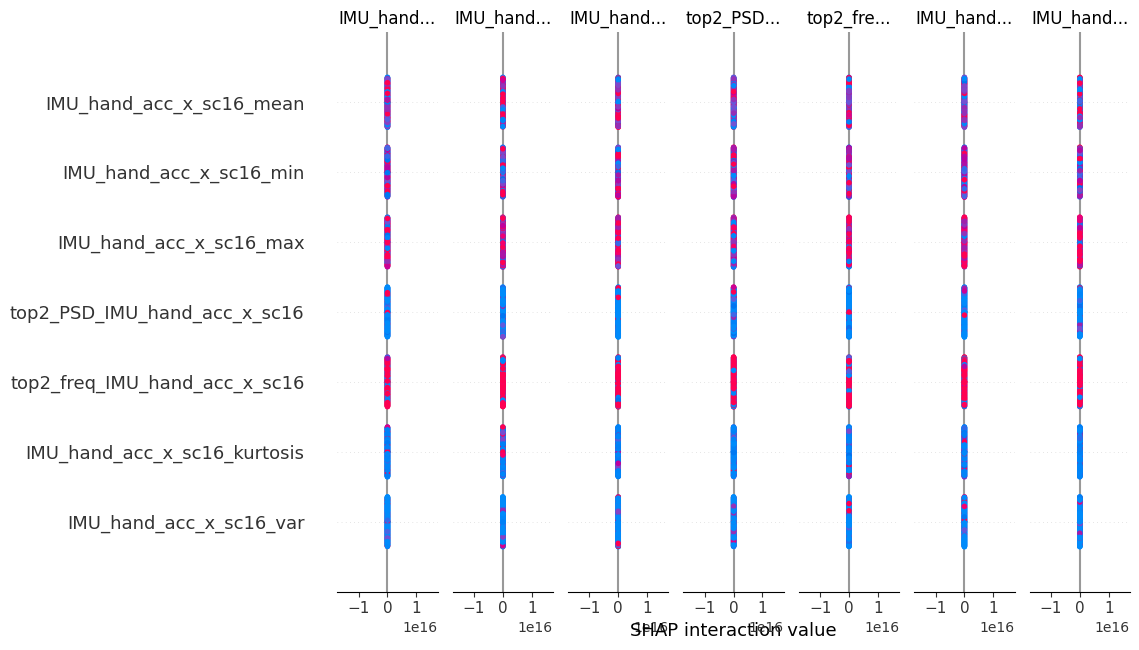


LIME available — generating local explanation and visualizations for target samples


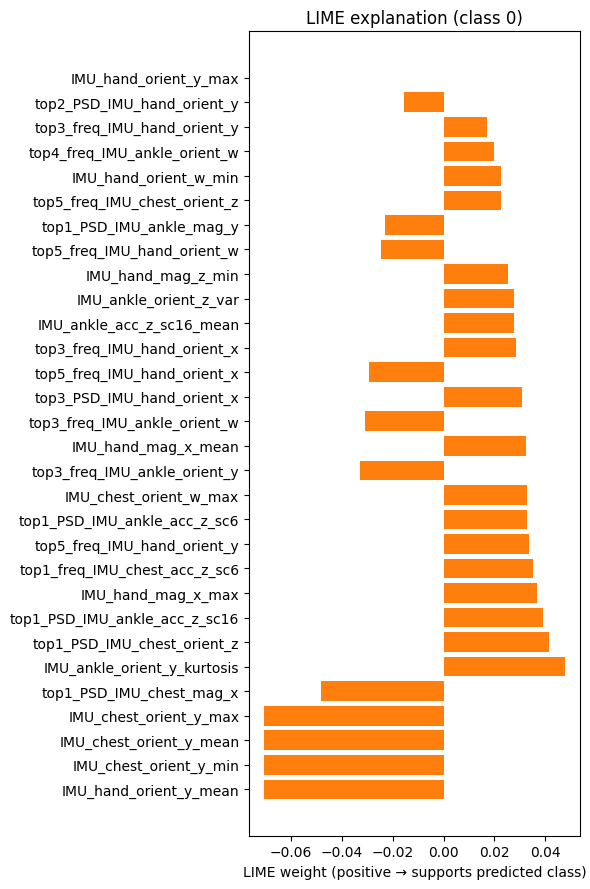

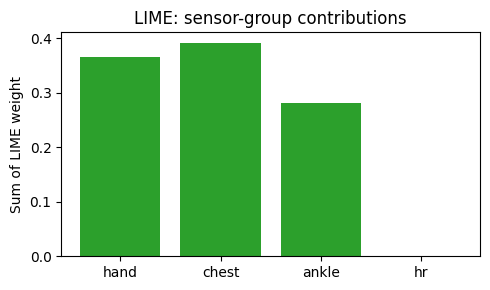

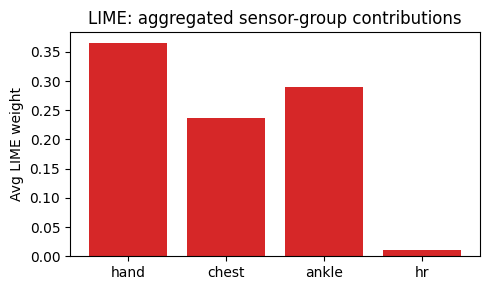


LIME sensor-group contributions (local sample vs aggregated):
  hand: local=0.3663, aggregated=0.3651
  chest: local=0.3914, aggregated=0.2366
  ankle: local=0.2814, aggregated=0.2892
  hr: local=0.0000, aggregated=0.0102


In [ ]:
#%pip install lime shap -q
#Ensure model and precomputed matrices exist
try:
    _ = X_src_s
    _ = X_tgt_s
    _ = feat_cols
    _ = y_act_src
except NameError:
    raise RuntimeError('Run PAAR cell first to produce X_src_s, X_tgt_s, feat_cols, y_act_src')
clf_act=LogisticRegression(max_iter=500, multi_class='multinomial', solver='saga')
clf_act.fit(X_src_s, y_act_src)
#Try SHAP
have_shap=False
try:
    import shap
    have_shap=True
except Exception as e:
    print('SHAP not available. Install with: pip install shap')

if have_shap:
    #Use a subset for quicker analysis since raw dataset is fairly large
    nsamp=min(500, X_src_s.shape[0])
    X_background=X_src_s[:nsamp]
    X_eval=X_tgt_s[:min(200, X_tgt_s.shape[0])]
    try:
        expl=shap.LinearExplainer(clf_act, X_background, feature_dependence='independent')
        shap_vals=expl.shap_values(X_eval)  #list (n_classes) of arrays
    except Exception:
        #fallback: KernelExplainer
        expl=shap.KernelExplainer(lambda x: clf_act.predict_proba(x), X_background)
        shap_vals=expl.shap_values(X_eval, nsamples=100)
    #Handle multiclass: shap_vals is list per class; compute mean absolute across classes
    if isinstance(shap_vals, list):
        #compute mean abs shap per feature across classes and samples
        mean_abs=np.mean([np.abs(sv).mean(axis=0) for sv in shap_vals], axis=0)
    else:
        mean_abs=np.abs(shap_vals).mean(axis=0)

    #Ensuring mean_abs is a 1-D numeric array.
    mean_abs = np.asarray(mean_abs)
    #If mean_abs has more than 1 dimension (unexpected), collapse to 1-D by averaging over first axis
    if mean_abs.ndim>1:
        mean_abs=mean_abs.mean(axis=0)
    #force float dtype and flatten
    mean_abs=np.asarray(mean_abs, dtype=float).ravel()
    #Show top-10 features by mean abs SHAP (use Python ints for indexing)
    top_idx=np.argsort(mean_abs)[-10:][::-1]
    top_idx_list=[int(i) for i in np.array(top_idx).ravel()]
    top_feats=[feat_cols[i] for i in top_idx_list]
    top_vals=[float(mean_abs[i]) for i in top_idx_list]
    print('\nTop features (mean |SHAP|):')
    for f, v in zip(top_feats, top_vals):
        print(f'  {f}: {v:.4f}')
    #Optional: SHAP summary plot (requires shap JS rendering support in notebook)
    try:
        shap.summary_plot(shap_vals, X_eval, feature_names=feat_cols, show=False)
        plt.tight_layout()
        plt.show()
    except Exception:
        pass

#LIME explanation for one sample (more local, per-sample)
try:
    from lime import lime_tabular
    have_lime=True
except Exception:
    have_lime=False
if have_lime:
    print('\nLIME available — generating local explanation and visualizations for target samples')

    #Choosing a target sample index to visualize (0 is first sample)
    sample_idx=0
    #Training subset for LIME
    X_train_for_lime=X_src_s[:500] if X_src_s.shape[0] > 500 else X_src_s

    explainer_lime=lime_tabular.LimeTabularExplainer(
        training_data=X_train_for_lime,
        feature_names=feat_cols,
        class_names=[str(i) for i in range(len(le.classes_))],
        mode='classification'
    )
    #Explain one sample (num_features controls how many features LIME returns)
    num_features_local=min(30, len(feat_cols))
    exp = explainer_lime.explain_instance(X_tgt_s[sample_idx], clf_act.predict_proba, num_features=num_features_local)

    #Get predicted class for that sample, and explanation map
    pred_class=int(clf_act.predict(X_tgt_s[sample_idx].reshape(1, -1))[0])
    exp_map=exp.as_map()
    #fallback to the first available class explanation if pred_class not present
    feat_list=exp_map.get(pred_class, next(iter(exp_map.values())))
    #feat_list: list of (feature_idx, weight)

    #Create dataframe for display/plotting (weights sign matters: positive supports predicted class)
    df_local=pd.DataFrame([(feat_cols[i], w) for i, w in feat_list], columns=['feature', 'weight'])
    df_local['abs_weight'] = df_local['weight'].abs()
    df_local=df_local.sort_values('abs_weight', ascending=True)  # for horizontal bar nice ordering
    #Plotting horizontal bar of LIME local contributions (feature-level)
    plt.figure(figsize=(6, max(2, len(df_local) * 0.3)))
    plt.barh(df_local['feature'], df_local['weight'], color='C1')
    plt.xlabel('LIME weight (positive → supports predicted class)')
    plt.title(f'LIME explanation (class {pred_class})')
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

    #Map features to sensor groups
    groups = {
        'hand': [i for i, c in enumerate(feat_cols) if 'IMU_hand_' in c],
        'chest': [i for i, c in enumerate(feat_cols) if 'IMU_chest_' in c],
        'ankle': [i for i, c in enumerate(feat_cols) if 'IMU_ankle_' in c],
        'hr': [i for i, c in enumerate(feat_cols) if ('hr' in c.lower()) or c.startswith('heart') ]
    }

    #Aggregate absolute LIME weights for the explained features (local sample)
    group_scores_local = {g: 0.0 for g in groups}
    for i, w in feat_list:
        for g, idxs in groups.items():
            if i in idxs:
                group_scores_local[g] += abs(w)

    #Plotting sensor-group contributions for this local LIME explanation
    names = list(group_scores_local.keys())
    vals = [group_scores_local[n] for n in names]
    plt.figure(figsize=(5,3))
    plt.bar(names, vals, color='C2')
    plt.ylabel('Sum of LIME weight')
    plt.title('LIME: sensor-group contributions')
    plt.tight_layout()
    plt.show()

    #Aggregated LIME across multiple target samples
    n_local_samples=min(200, X_tgt_s.shape[0])  #Configurable
    agg = {g: 0.0 for g in groups}
    for si in range(n_local_samples):
        exp_i=explainer_lime.explain_instance(X_tgt_s[si], clf_act.predict_proba, num_features=num_features_local)
        pred_i=int(clf_act.predict(X_tgt_s[si].reshape(1, -1))[0])
        fl_i=exp_i.as_map().get(pred_i, next(iter(exp_i.as_map().values())))
        for i, w in fl_i:
            for g, idxs in groups.items():
                if i in idxs:
                    agg[g] += abs(w)
    #Average across explained samples
    for g in agg:
        agg[g]/=max(1, n_local_samples)
    #Plotting aggregated sensor-group contributions from LIME (high-level)
    names=list(agg.keys())
    vals=[agg[n] for n in names]
    plt.figure(figsize=(5,3))
    plt.bar(names, vals, color='C3')
    plt.ylabel(f'Avg LIME weight')
    plt.title('LIME: aggregated sensor-group contributions')
    plt.tight_layout()
    plt.show()
    #Printing concise table of local and aggregated group scores (textual)
    print('\nLIME sensor-group contributions (local sample vs aggregated):')
    for g in names:
        print(f'  {g}: local={group_scores_local[g]:.4f}, aggregated={agg[g]:.4f}')
else:
    print('\nLIME not available. Install with: pip install lime if you want local explanations')

## References:
Other projects exploring IMU-based HAR have been referred to for the completion of this project for both dataset preprocessing as well as for model training. Code fixes generated by GPT-5 via the Copilot extension for VSCode have been thoroughly simulated to ensure rationality and transparency.
1. https://github.com/EdnaEze/Physical-Activity-Monitoring/blob/main/DSRM-Edna.ipynb
2. https://www.kaggle.com/code/phamson/wip-pamap2-data-exploration
3. https://techlabs-aachen.medium.com/human-activity-recognition-1-6f9fcc9c773c
4. https://datastud.dev/posts/time-series-eda
5. https://towardsdatascience.com/how-to-do-an-eda-for-time-series-cbb92b3b1913/